In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sea
import sklearn 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd 
data = pd.read_csv("C:/Users/TAWFEEQ/Desktop/wine dataset.csv")

In [ ]:
data.head()

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [6]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
data['fixed acidity'].value_counts()


6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
7.20     273
6.70     264
7.10     257
6.50     242
7.40     238
7.30     222
6.20     210
6.30     201
7.60     199
6.00     197
7.50     174
6.10     169
7.80     146
7.70     141
5.80     125
8.00     122
7.90     116
5.90     111
8.20     101
8.30      92
5.70      90
5.60      85
8.10      82
8.40      61
8.60      52
        ... 
12.60      4
12.20      4
12.40      4
13.00      3
11.70      3
11.00      3
13.30      3
4.40       3
13.20      3
6.15       2
15.50      2
12.90      2
4.20       2
15.60      2
7.15       2
13.70      2
15.00      2
4.60       2
13.40      1
13.50      1
3.80       1
4.50       1
12.10      1
14.00      1
3.90       1
14.30      1
15.90      1
13.80      1
14.20      1
6.45       1
Name: fixed acidity, Length: 106, dtype: int64

In [8]:
mean_fa = data['fixed acidity'].mean()
data['fixed acidity'].fillna(mean_fa, inplace = True)
data['fixed acidity'].isnull().sum()

0

In [9]:
data['volatile acidity'].value_counts()

0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
0.270    232
0.230    221
0.200    217
0.300    214
0.320    205
0.210    197
0.180    187
0.310    178
0.290    176
0.190    171
0.340    164
0.330    154
0.160    143
0.360    142
0.170    140
0.350    107
0.380     98
0.400     96
0.390     95
0.370     89
0.150     88
0.410     87
0.430     78
0.440     69
0.420     67
        ... 
0.890      1
0.135      1
0.090      1
1.115      1
1.010      1
0.215      1
0.355      1
0.955      1
1.240      1
1.070      1
0.930      1
1.580      1
1.025      1
0.920      1
0.085      1
1.035      1
0.975      1
0.845      1
1.100      1
0.905      1
0.950      1
0.825      1
0.175      1
0.895      1
0.405      1
0.805      1
1.130      1
1.185      1
0.565      1
0.865      1
Name: volatile acidity, Length: 187, dtype: int64

In [10]:
mean_va = data['volatile acidity'].mean()
data['volatile acidity'].fillna(mean_va, inplace = True)
data['volatile acidity'].isnull().sum()

0

In [11]:
data['citric acid'].value_counts()


0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
0.34    249
0.29    244
0.27    236
0.24    232
0.31    229
0.33    208
0.36    197
0.25    163
0.37    153
0.35    150
0.00    150
0.40    146
0.38    136
0.22    131
0.39    129
0.42    124
0.23    108
0.21     99
0.41     98
0.20     95
0.44     86
0.18     71
0.46     70
0.19     69
0.45     68
       ... 
0.66     21
0.68     18
0.11     16
0.60     15
0.62     15
0.65     15
0.64     15
0.59     14
0.63     14
0.61     11
0.71     10
0.69      9
0.67      9
0.73      8
0.72      6
1.00      6
0.70      5
0.78      3
0.76      3
0.79      3
0.80      2
0.91      2
0.81      2
0.82      2
0.88      1
1.66      1
0.75      1
0.86      1
0.99      1
1.23      1
Name: citric acid, Length: 89, dtype: int64

In [12]:
mean_ca = data['citric acid'].mean()
data['citric acid'].fillna(mean_ca, inplace = True)
data['citric acid'].isnull().sum()

0

In [13]:
data['residual sugar'].value_counts()

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
2.20     187
2.10     179
1.90     176
1.70     175
1.50     171
1.30     152
2.30     150
1.10     146
2.40     127
2.50     124
2.60     112
1.00      93
2.80      85
2.70      77
2.90      49
4.60      46
5.00      44
7.80      43
3.20      43
3.00      42
4.80      41
6.30      41
0.90      41
7.40      40
6.40      37
        ... 
15.25      1
19.90      1
8.55       1
5.55       1
65.80      1
18.50      1
15.15      1
20.40      1
6.35       1
11.45      1
18.40      1
7.95       1
17.35      1
20.15      1
3.65       1
8.45       1
19.10      1
16.45      1
9.05       1
16.55      1
19.60      1
7.45       1
22.60      1
6.95       1
8.65       1
14.15      1
14.05      1
3.15       1
8.95       1
20.30      1
Name: residual sugar, Length: 316, dtype: int64

In [14]:
mean_rs = data['residual sugar'].mean()
data['residual sugar'].fillna(mean_rs, inplace = True)
data['residual sugar'].isnull().sum()

0

In [15]:
data['chlorides'].value_counts()

0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
0.048    182
0.040    182
0.047    175
0.045    174
0.034    169
0.038    168
0.039    161
0.037    160
0.041    151
0.043    142
0.049    141
0.053    135
0.035    130
0.033    119
0.051    116
0.052    114
0.054    112
0.032    109
0.030    108
0.031    107
0.056     97
0.028     85
0.029     81
0.057     78
0.080     70
        ... 
0.143      1
0.290      1
0.149      1
0.267      1
0.209      1
0.464      1
0.403      1
0.236      1
0.211      1
0.204      1
0.156      1
0.190      1
0.130      1
0.240      1
0.222      1
0.212      1
0.301      1
0.113      1
0.263      1
0.611      1
0.413      1
0.009      1
0.239      1
0.387      1
0.343      1
0.213      1
0.165      1
0.150      1
0.144      1
0.125      1
Name: chlorides, Length: 214, dtype: int64

In [16]:
mean_c = data['chlorides'].mean()
data['chlorides'].fillna(mean_c, inplace = True)
data['chlorides'].isnull().sum()

0

In [17]:
data['pH'].value_counts()


3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
3.15    170
3.18    168
3.24    160
3.12    154
3.10    154
3.17    151
3.30    150
3.26    149
3.08    147
3.23    147
3.25    140
3.36    139
3.11    135
3.21    131
3.32    131
3.13    130
3.28    129
3.29    126
3.06    124
3.27    123
3.34    122
3.31    118
3.04    107
3.38    106
3.09    103
       ... 
3.63      9
3.68      7
3.69      6
3.72      6
3.62      5
3.65      4
3.67      4
2.83      4
3.71      4
3.74      3
2.79      3
3.75      3
2.80      3
3.77      2
3.80      2
2.74      2
3.70      2
3.78      2
3.76      2
3.90      2
3.64      2
4.01      2
2.72      1
3.85      1
3.79      1
3.81      1
2.77      1
2.82      1
2.84      1
3.82      1
Name: pH, Length: 108, dtype: int64

In [18]:
mean_pH = data['pH'].mean()
data['pH'].fillna(mean_pH, inplace = True)
data['pH'].isnull().sum()

0

In [19]:
data['sulphates'].value_counts()

0.50    275
0.46    243
0.54    234
0.44    232
0.38    214
0.48    208
0.52    203
0.49    197
0.47    191
0.45    190
0.42    186
0.53    186
0.40    172
0.43    169
0.56    168
0.58    167
0.51    166
0.39    157
0.60    157
0.55    152
0.59    148
0.41    139
0.57    138
0.37    131
0.62    129
0.36    120
0.64    113
0.63     96
0.61     90
0.35     85
       ... 
1.05      3
1.28      2
1.10      2
1.13      2
1.01      2
1.03      2
1.95      2
1.00      2
1.04      2
1.07      2
1.14      2
1.34      1
2.00      1
1.16      1
1.61      1
1.15      1
1.22      1
1.31      1
1.09      1
0.23      1
0.22      1
1.11      1
1.20      1
1.98      1
1.26      1
1.59      1
1.12      1
1.33      1
1.56      1
1.62      1
Name: sulphates, Length: 111, dtype: int64

In [20]:
mean_s = data['sulphates'].mean()
data['sulphates'].fillna(mean_s, inplace = True)
data['sulphates'].isnull().sum()

0

In [21]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

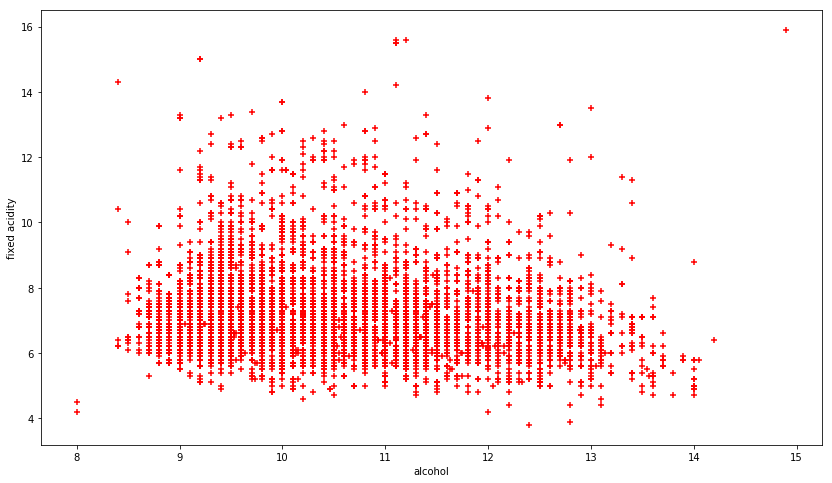

In [22]:
'''
Visualization of the data
x - alcohol
y - fixed acidity
'''
plt.figure(figsize=(14, 8))
plt.scatter(x = 'alcohol', y = 'fixed acidity', data = data, marker = '+', c='r')
plt.xlabel('alcohol')
plt.ylabel('fixed acidity')
#plt.show()

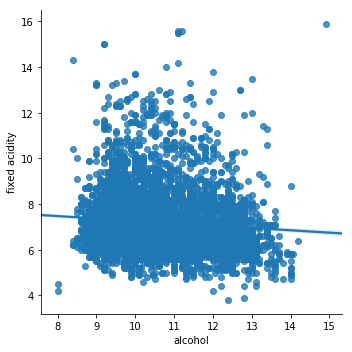

In [23]:
sea.lmplot(x='alcohol', y='fixed acidity', data = data)
#plt.show()

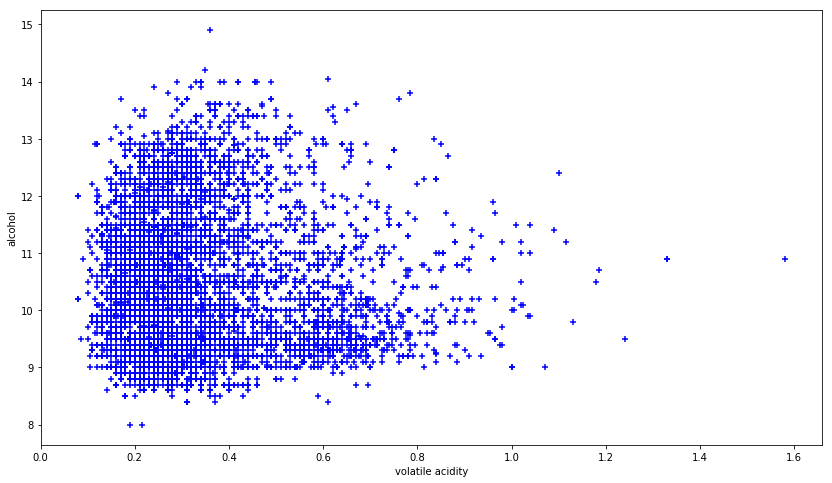

In [25]:
plt.figure(figsize=(14,8))
plt.scatter(x ='volatile acidity', y = 'alcohol', data = data, marker = '+', c = 'b')
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
#plt.show()

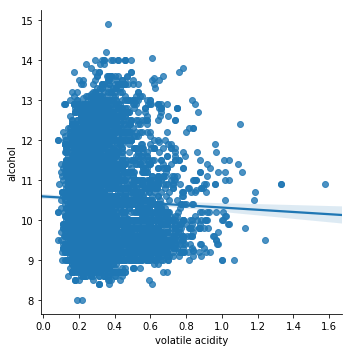

In [26]:
sea.lmplot(x='volatile acidity', y='alcohol', data = data)
#plt.plot()

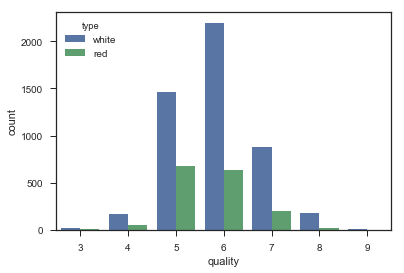

In [27]:
sea.set(style = 'ticks')
sea.countplot(data['quality'], hue = 'type', data = data)
#plt.show()

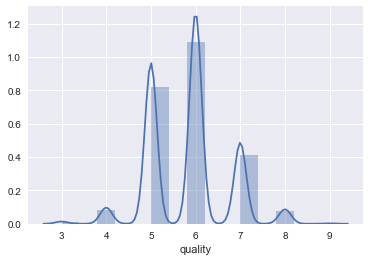

In [28]:
sea.set()
sea.distplot(data['quality'], bins = 15)
#plt.show()

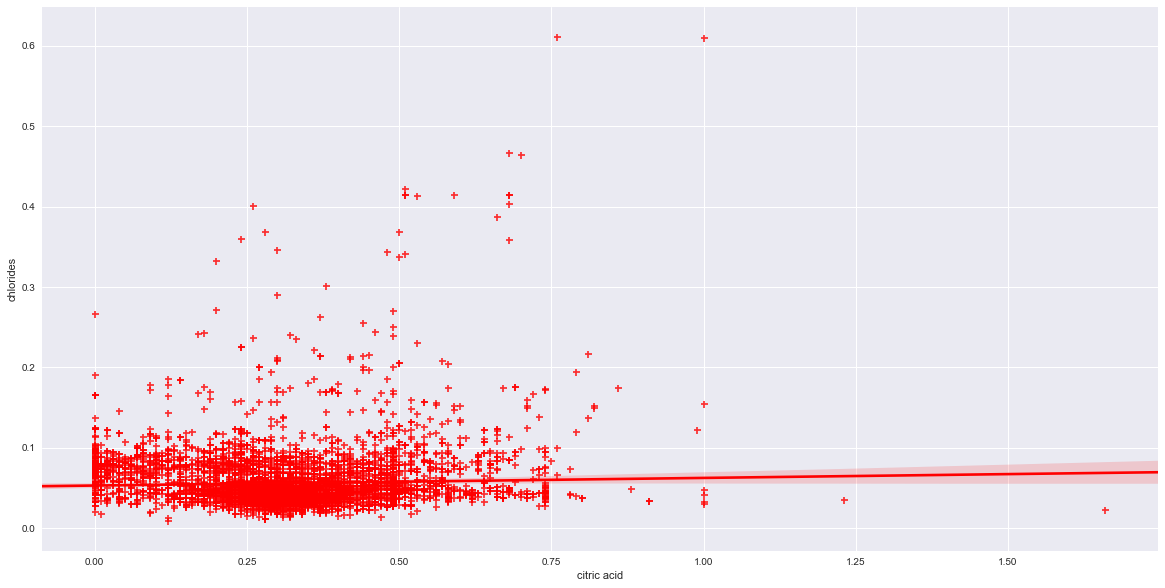

In [29]:
plt.figure(figsize = (20, 10))
sea.regplot(x = 'citric acid', y = 'chlorides', data = data, marker = '+', color = 'r')
#plt.show()

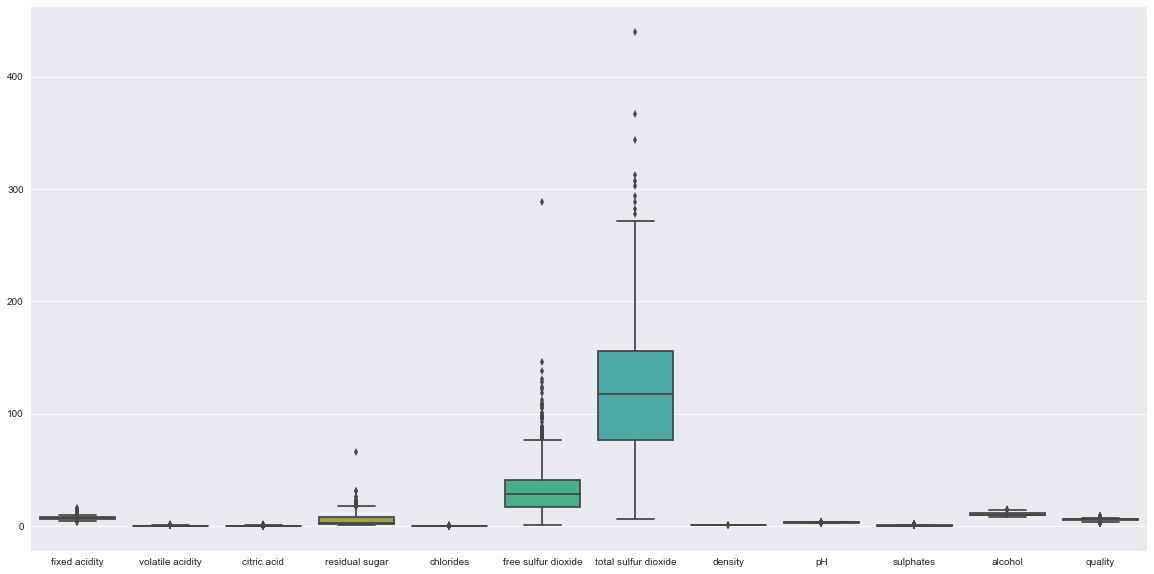

In [31]:
sea.set()
plt.figure(figsize = (20, 10))
sea.boxplot(data = data)
#plt.show()

In [32]:
low = data['free sulfur dioxide'].mean() - 3*data['free sulfur dioxide'].std()
high = data['free sulfur dioxide'].mean() + 3*data['free sulfur dioxide'].std()
print('low = ', low)
print('high = ', high)

low =  -22.722879937833156
high =  83.77351869418224


In [33]:
data_copy = data[(data['free sulfur dioxide'] > low) & (data['free sulfur dioxide'] < high)]
print(data_copy)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white       7.000000          0.270000         0.36           20.70   
1     white       6.300000          0.300000         0.34            1.60   
2     white       8.100000          0.280000         0.40            6.90   
3     white       7.200000          0.230000         0.32            8.50   
4     white       7.200000          0.230000         0.32            8.50   
5     white       8.100000          0.280000         0.40            6.90   
6     white       6.200000          0.320000         0.16            7.00   
7     white       7.000000          0.270000         0.36           20.70   
8     white       6.300000          0.300000         0.34            1.60   
9     white       8.100000          0.220000         0.43            1.50   
10    white       8.100000          0.270000         0.41            1.45   
11    white       8.600000          0.230000         0.40            4.20   

In [34]:
data.shape[0]

6497

In [35]:
data_copy.shape[0]

6461

In [36]:
difference = data.shape[0] - data_copy.shape[0]
difference

36

In [37]:
low = data_copy['total sulfur dioxide'].mean() - 3*data_copy['total sulfur dioxide'].std()
high = data_copy['total sulfur dioxide'].mean() + 3*data_copy['total sulfur dioxide'].std()
print('low = ', low)
print('high = ', high)

low =  -53.15243132839596
high =  283.65436601342924


In [38]:
data_copy2 = data_copy[(data_copy['total sulfur dioxide'] > low) & (data_copy['total sulfur dioxide'] < high)]
print(data_copy2)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white       7.000000          0.270000         0.36           20.70   
1     white       6.300000          0.300000         0.34            1.60   
2     white       8.100000          0.280000         0.40            6.90   
3     white       7.200000          0.230000         0.32            8.50   
4     white       7.200000          0.230000         0.32            8.50   
5     white       8.100000          0.280000         0.40            6.90   
6     white       6.200000          0.320000         0.16            7.00   
7     white       7.000000          0.270000         0.36           20.70   
8     white       6.300000          0.300000         0.34            1.60   
9     white       8.100000          0.220000         0.43            1.50   
10    white       8.100000          0.270000         0.41            1.45   
11    white       8.600000          0.230000         0.40            4.20   

In [39]:
data_copy.shape[0] - data_copy2.shape[0]

5

In [41]:
low = data_copy2['residual sugar'].mean() - 3*data_copy2['residual sugar'].std()
high = data_copy2['residual sugar'].mean() + 3*data_copy2['residual sugar'].std()
print('low = ', low)
print('high = ', high)

low =  -8.835863630876144
high =  19.712440041288158


In [42]:
data_copy3 = data_copy2[(data_copy2['residual sugar'] > low) & (data_copy2['residual sugar'] < high)]
print(data_copy3)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1     white       6.300000          0.300000         0.34            1.60   
2     white       8.100000          0.280000         0.40            6.90   
3     white       7.200000          0.230000         0.32            8.50   
4     white       7.200000          0.230000         0.32            8.50   
5     white       8.100000          0.280000         0.40            6.90   
6     white       6.200000          0.320000         0.16            7.00   
8     white       6.300000          0.300000         0.34            1.60   
9     white       8.100000          0.220000         0.43            1.50   
10    white       8.100000          0.270000         0.41            1.45   
11    white       8.600000          0.230000         0.40            4.20   
12    white       7.900000          0.180000         0.37            1.20   
13    white       6.600000          0.160000         0.40            1.50   

In [43]:
data_copy2.shape[0] - data_copy3.shape[0]

26

In [44]:
data_copy3.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
tmp = pd.get_dummies(data_copy3['type'], drop_first = True)

In [46]:
data_copy3 = pd.concat([data_copy3, tmp], axis = 1)
data_copy3.drop('type', axis = 1, inplace = True)
print(data_copy3)
print('----------')
data_copy3.head()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1          6.300000          0.300000         0.34            1.60      0.049   
2          8.100000          0.280000         0.40            6.90      0.050   
3          7.200000          0.230000         0.32            8.50      0.058   
4          7.200000          0.230000         0.32            8.50      0.058   
5          8.100000          0.280000         0.40            6.90      0.050   
6          6.200000          0.320000         0.16            7.00      0.045   
8          6.300000          0.300000         0.34            1.60      0.049   
9          8.100000          0.220000         0.43            1.50      0.044   
10         8.100000          0.270000         0.41            1.45      0.033   
11         8.600000          0.230000         0.40            4.20      0.035   
12         7.900000          0.180000         0.37            1.20      0.040   
13         6.600000         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1


In [47]:
data_copy3.quality.value_counts()
print(data_copy3)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1          6.300000          0.300000         0.34            1.60      0.049   
2          8.100000          0.280000         0.40            6.90      0.050   
3          7.200000          0.230000         0.32            8.50      0.058   
4          7.200000          0.230000         0.32            8.50      0.058   
5          8.100000          0.280000         0.40            6.90      0.050   
6          6.200000          0.320000         0.16            7.00      0.045   
8          6.300000          0.300000         0.34            1.60      0.049   
9          8.100000          0.220000         0.43            1.50      0.044   
10         8.100000          0.270000         0.41            1.45      0.033   
11         8.600000          0.230000         0.40            4.20      0.035   
12         7.900000          0.180000         0.37            1.20      0.040   
13         6.600000         

In [48]:

quality_map = { 3 : 'Low', 4 : 'Low', 5: 'Medium', 6 : 'Medium', 7: 'Medium', 8 : 'High', 9 : 'High'}
data_copy3['quality'] =  data_copy3['quality'].map(quality_map)
print(data_copy3)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1          6.300000          0.300000         0.34            1.60      0.049   
2          8.100000          0.280000         0.40            6.90      0.050   
3          7.200000          0.230000         0.32            8.50      0.058   
4          7.200000          0.230000         0.32            8.50      0.058   
5          8.100000          0.280000         0.40            6.90      0.050   
6          6.200000          0.320000         0.16            7.00      0.045   
8          6.300000          0.300000         0.34            1.60      0.049   
9          8.100000          0.220000         0.43            1.50      0.044   
10         8.100000          0.270000         0.41            1.45      0.033   
11         8.600000          0.230000         0.40            4.20      0.035   
12         7.900000          0.180000         0.37            1.20      0.040   
13         6.600000         

In [49]:
data_copy3.quality.value_counts()


Medium    5997
Low        239
High       194
Name: quality, dtype: int64

In [50]:
map_quality = {'Low': 0, 'Medium': 1, 'High': 2}
data_copy3['quality'] = data_copy3['quality'].map(map_quality)
print(data_copy3)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1          6.300000          0.300000         0.34            1.60      0.049   
2          8.100000          0.280000         0.40            6.90      0.050   
3          7.200000          0.230000         0.32            8.50      0.058   
4          7.200000          0.230000         0.32            8.50      0.058   
5          8.100000          0.280000         0.40            6.90      0.050   
6          6.200000          0.320000         0.16            7.00      0.045   
8          6.300000          0.300000         0.34            1.60      0.049   
9          8.100000          0.220000         0.43            1.50      0.044   
10         8.100000          0.270000         0.41            1.45      0.033   
11         8.600000          0.230000         0.40            4.20      0.035   
12         7.900000          0.180000         0.37            1.20      0.040   
13         6.600000         

In [51]:
x = data_copy3.drop('quality',axis=1)
y = data_copy3['quality']

In [52]:
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[ 0.08564838  0.10677143  0.08485914  0.0872269   0.08955658  0.09949098
  0.08592203  0.08216449  0.08405464  0.09414621  0.09330975  0.00684946]


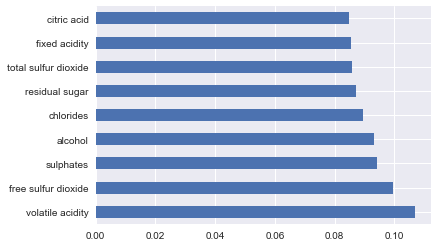

In [53]:
imp_features = pd.Series(model.feature_importances_, index = x.columns)
imp_features.nlargest(9).plot(kind = 'barh')
plt.show()

In [64]:
'''
Using SVC - Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, 
Gaussian Naive Bayes, and Logistic Regression. 
'''
model_params  = {
    'svm' : {
        'model':SVC(gamma='auto'),
        'params':{
            'C' : [1,10,20],
            'kernel':['rbf']
        }
    },
    
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini'],
            'max_depth':[5,8,9]
        }
    },
    
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10],
            'max_depth':[5,8,9]
        }
    },
    'naive_bayes':{
        'model': GaussianNB(),
        'params':{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='newton-cg',multi_class = 'multinomial'),
        'params': {
            "C" : [1,5,10]
        }
    }
    
}

In [65]:
score = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=8, return_train_score=False, refit=True)
    clf.fit(x,y)
    score.append({
        'Model' : model_name,
        'Best_Score': clf.best_score_,
        'Best_Params': clf.best_params_
    })

In [66]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.2.


In [67]:
data_copy4 = pd.DataFrame(score, columns = ['Model', 'Best_Score', 'Best_Params'])

In [68]:
data_copy4

,Model,Best_Score,Best_Params
0,svm,0.932193,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.921773,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.932504,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.726905,{}
4,logistic_regression,0.932815,{'C': 10}


In [71]:
'''
Using SVM - Support Vector Machine
'''
clf_svm = SVC(kernel = 'rbf', C = 1)
scores = cross_val_score(clf_svm, x, y, cv = 8, scoring = 'accuracy')
scores

array([ 0.93167702,  0.93043478,  0.93159204,  0.93159204,  0.9340796 ,
        0.93275218,  0.93275218,  0.93266833])

In [72]:
scores.mean()

0.93219352133329703

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train)
print('-------x_train complete---------')
print(x_test)
print('-------x_test complete---------')
print(y_train)
print('-------y_train complete---------')
print(y_test)
print('-------y_test complete---------')

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2660            6.7             0.330         0.34            6.60      0.067   
3354            5.9             0.200         0.28           12.80      0.038   
1041            7.7             0.275         0.30            1.00      0.039   
3490            7.6             0.310         0.24            1.80      0.037   
2746            7.0             0.340         0.30            1.80      0.045   
193             6.6             0.150         0.34            5.10      0.055   
5920            7.0             0.510         0.09            2.10      0.062   
6339            7.4             0.785         0.19            5.20      0.094   
1391            6.2             0.160         0.47            1.40      0.029   
5113            7.0             0.490         0.49            5.60      0.060   
3934            7.3             0.270         0.30            1.30      0.040   
3686            7.6         

In [78]:
clf_svm1 = SVC(kernel='rbf', C = 1)
clf_svm1.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
y_pred = clf_svm1.predict(x_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.93779160186625199

In [86]:
'''
Testing on the split test-data
'''
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
accuracy_dataframe.head(n = 100)

,y_pred,y_test
1935,1,1
1106,1,2
2932,1,1
743,1,1
2230,1,1
1584,1,1
4583,1,1
567,1,1
4333,2,2
4414,1,1
